In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalación de paquetes

In [2]:
pip install scikit-learn

In [3]:
pip install pandas folium openpyxl

Importación de librerias

In [4]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Análisis Tipologico enfocada para la caracterización de los agrícultores de la cadena de la papa en Colombia

# Resumen
La generación de tipologías en el sector agrícola es una herramienta crucial para la caracterización de los diferentes actores que forman parte de la cadena de producción y comercialización. Esta práctica se considera parte del estado del arte en la gestión del cultivo, y realizar la construcción de tipologías de manera adecuada ofrece grandes ventajas.

Nuestro objetivo principal es desarrollar una tipología para los agricultores de papa utilizando información recolectada del CNA (Centro Nacional de Agricultura) y datos generados por la UPRA (Unidad de Planificación Rural Agropecuaria). El propósito es obtener una visión clara de los actores en la primera fase de la producción y comercialización de papa. De esta manera, buscamos consolidar bloques de productores según sus rendimientos y características socioeconómicas.

La utilización de tipologías,

# Descripción

Título del proyecto.
Resumen. Una síntesis de lo hecho hasta el momento. Ésta es una parte critica de un trabajo, de hecho, es a veces lo único que se lee. Es por ello, que es una parte integral del proyecto y en esta primera entrega se espera que ustedes tengan una primera aproximación que irán mejorando con el tiempo
Introducción. Donde se establece el problema o la pregunta bien definida con una motivación clara para resolverla.
Revisión preliminar de antecedentes en la literatura. Revisión de literatura nacional e internacional, para enriquecer el proyecto con lo que ya se haya escrito sobre el tema que se va a tratar.  
Descripción detallada de los datos.  Descripción que incorpore estadísticas descriptivas y/o visualizaciones.
Propuesta metodológica. En esta sección debe mostrarse cómo el proyecto incorpora aprendizaje no supervisado y qué algoritmo planean utilizar. (Este algoritmo puede ser preliminar y pueden modificarlo para la entrega final, si ven que a lo largo del curso incorporan nuevas herramientas que pueden resultar más apropiadas)
Bibliografía. Incorpora los artículos mencionados en el texto.

Tipologia para la identificación del cultivo de papa en Colombia

# Estadísticas descriptivas


In [5]:
archivo_excel = 'UPAS_PAPA.xls'

# Leer el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/UPAS_PAPA.xls', engine='xlrd')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
df.head()

,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,aptitudS2,Area_Carto_ha,Tamanopredial16,Informalidad,AF,Aptitud_ps1,Aptitud_ps2,tipo_frontera,POINT_X,POINT_Y
0,1,4.536894,Papa negra,Técnificado,NaN,NaN,NaN,NaN,5.675319,2.837659,...,No apta,0.770883,"A2.Mayor a 0,5 ha - hasta 1 ha",INFORMAL,Agricultura familiar,No_Apto,No_Apto,No condicionada,-77.136139,0.466445
1,2,5.746113,Papa negra,Técnificado,NaN,NaN,NaN,NaN,6.251476,3.125738,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
2,3,2.497989,Papa negra,Tradicional,NaN,NaN,NaN,NaN,2.700281,1.350141,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
3,4,3.067768,Papa negra,Técnificado,NaN,NaN,NaN,NaN,1.784022,0.892011,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
4,5,4.313402,Papa negra,Técnificado,NaN,NaN,NaN,NaN,2.891453,1.445727,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617


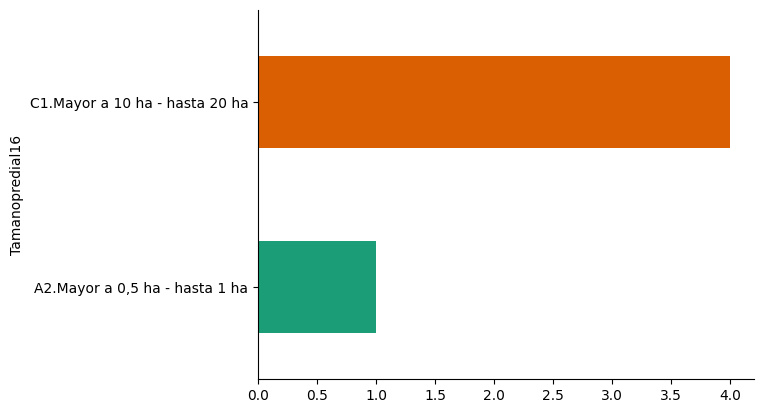

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_66.groupby('Tamanopredial16').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37484 entries, 0 to 37483
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                37484 non-null  int64  
 1   UPA_AREA_ha             37484 non-null  float64
 2   VARIEDAD                37484 non-null  object 
 3   TIPO_CULTIVO            37484 non-null  object 
 4   AREA_SEMBRADA_CRIOLLA   6221 non-null   float64
 5   AREA_COSECHADA_CRIOLLA  6221 non-null   float64
 6   PRODUCCION_CRIOLLA      6221 non-null   float64
 7   RENDIMIENTO_CRIOLLA     1258 non-null   float64
 8   AREA_SEMBRADA_NEGRA     32869 non-null  float64
 9   AREA_COSECHADA_NEGRA    32869 non-null  float64
 10  PRODUCCION_NEGRA        32869 non-null  float64
 11  RENDIMIENTO_NEGRA       32869 non-null  float64
 12  elemento                37484 non-null  object 
 13  aptitudS1               37484 non-null  object 
 14  aptitudS2               37484 non-null

In [ ]:
df.describe()

,OBJECTID,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha,POINT_X,POINT_Y
count,37484.000000,37484.000000,6221.000000,6221.000000,6221.000000,1258.000000,32869.000000,32869.000000,32869.000000,32869.000000,36895.000000,37484.000000,37484.000000
mean,18742.500000,30.816426,1.531621,0.276534,4.947853,19.086428,3.190960,2.371406,38.094987,15.589609,304.877690,-75.219435,3.798193
std,10820.843082,1118.108164,12.054708,2.044221,36.231268,3.510013,71.816320,63.757661,931.580312,5.277459,1898.955830,1.857392,2.160563
min,1.000000,0.007254,0.010017,0.000000,0.000000,0.000273,0.010026,0.010026,0.036156,3.361252,0.003464,-77.941899,0.466445
25%,9371.750000,0.530939,0.105607,0.000000,0.000000,17.831738,0.127145,0.095182,1.306891,12.361419,0.779181,-77.301460,1.164461
50%,18742.500000,1.680011,0.321600,0.000000,0.000000,18.676614,0.539060,0.393605,5.703993,14.925701,2.179344,-75.257668,4.860516
75%,28113.250000,5.190562,1.000000,0.000000,0.000000,20.348524,1.905341,1.372049,21.323980,18.869852,7.456091,-73.514450,5.510657
max,37484.000000,123198.560100,572.782411,123.417969,2222.049240,112.083752,8192.000000,8192.000000,125889.037665,34.959519,102149.890628,-72.260310,7.534768


from matplotlib import pyplot as plt
_df_0['OBJECTID'].plot(kind='hist', bins=20, title='OBJECTID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UPA_AREA_ha'].plot(kind='hist', bins=20, title='UPA_AREA_ha')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AREA_SEMBRADA_CRIOLLA'].plot(kind='hist', bins=20, title='AREA_SEMBRADA_CRIOLLA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AREA_COSECHADA_CRIOLLA'].plot(kind='hist', bins=20, title='AREA_COSECHADA_CRIOLLA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='OBJECTID', y='UPA_AREA_ha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='UPA_AREA_ha', y='AREA_SEMBRADA_CRIOLLA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AREA_SEMBRADA_CRIOLLA', y='AREA_COSECHADA_CRIOLLA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AREA_COSECHADA_CRIOLLA', y='PRODUCCION_CRIOLLA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['OBJECTID'].plot(kind='line', figsize=(8, 4), title='OBJECTID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['UPA_AREA_ha'].plot(kind='line', figsize=(8, 4), title='UPA_AREA_ha')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AREA_SEMBRADA_CRIOLLA'].plot(kind='line', figsize=(8, 4), title='AREA_SEMBRADA_CRIOLLA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AREA_COSECHADA_CRIOLLA'].plot(kind='line', figsize=(8, 4), title='AREA_COSECHADA_CRIOLLA')
plt.gca().spines[['top', 'right']].set_visible(False)

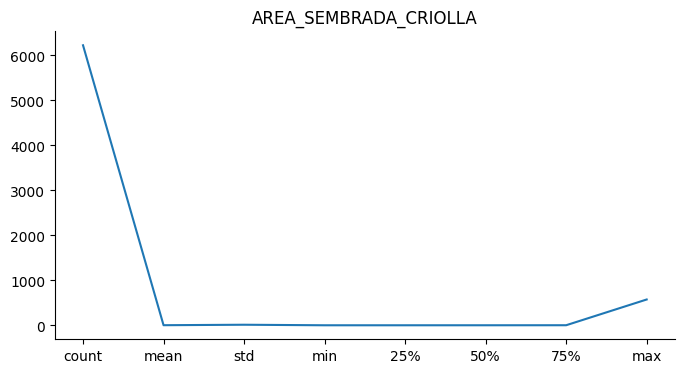

In [ ]:
from matplotlib import pyplot as plt
_df_10['AREA_SEMBRADA_CRIOLLA'].plot(kind='line', figsize=(8, 4), title='AREA_SEMBRADA_CRIOLLA')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Seleccionar el 10% de los datos de forma aleatoria
df_sample = df.sample(frac=0.01, random_state=42)

# Crea un mapa base centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Iterar sobre las filas del DataFrame de la muestra y agregar marcadores al mapa
for index, row in df_sample.iterrows():
    lat = row['POINT_Y']  # Latitud
    lon = row['POINT_X']  # Longitud
    folium.Marker([lat, lon], popup=f'Point {index}').add_to(mapa)


In [ ]:
mapa

In [6]:
# Filtran solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])
df_numerico=df_numerico.drop(columns=['POINT_X','POINT_Y','OBJECTID'])

In [ ]:
scaler = StandardScaler()

# Ajustar el escalador y transformar los datos numéricos
df_numerico_estandarizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

# Reemplazar los datos originales por los estandarizados en el DataFrame original
df[df_numerico.columns] = df_numerico_estandarizado

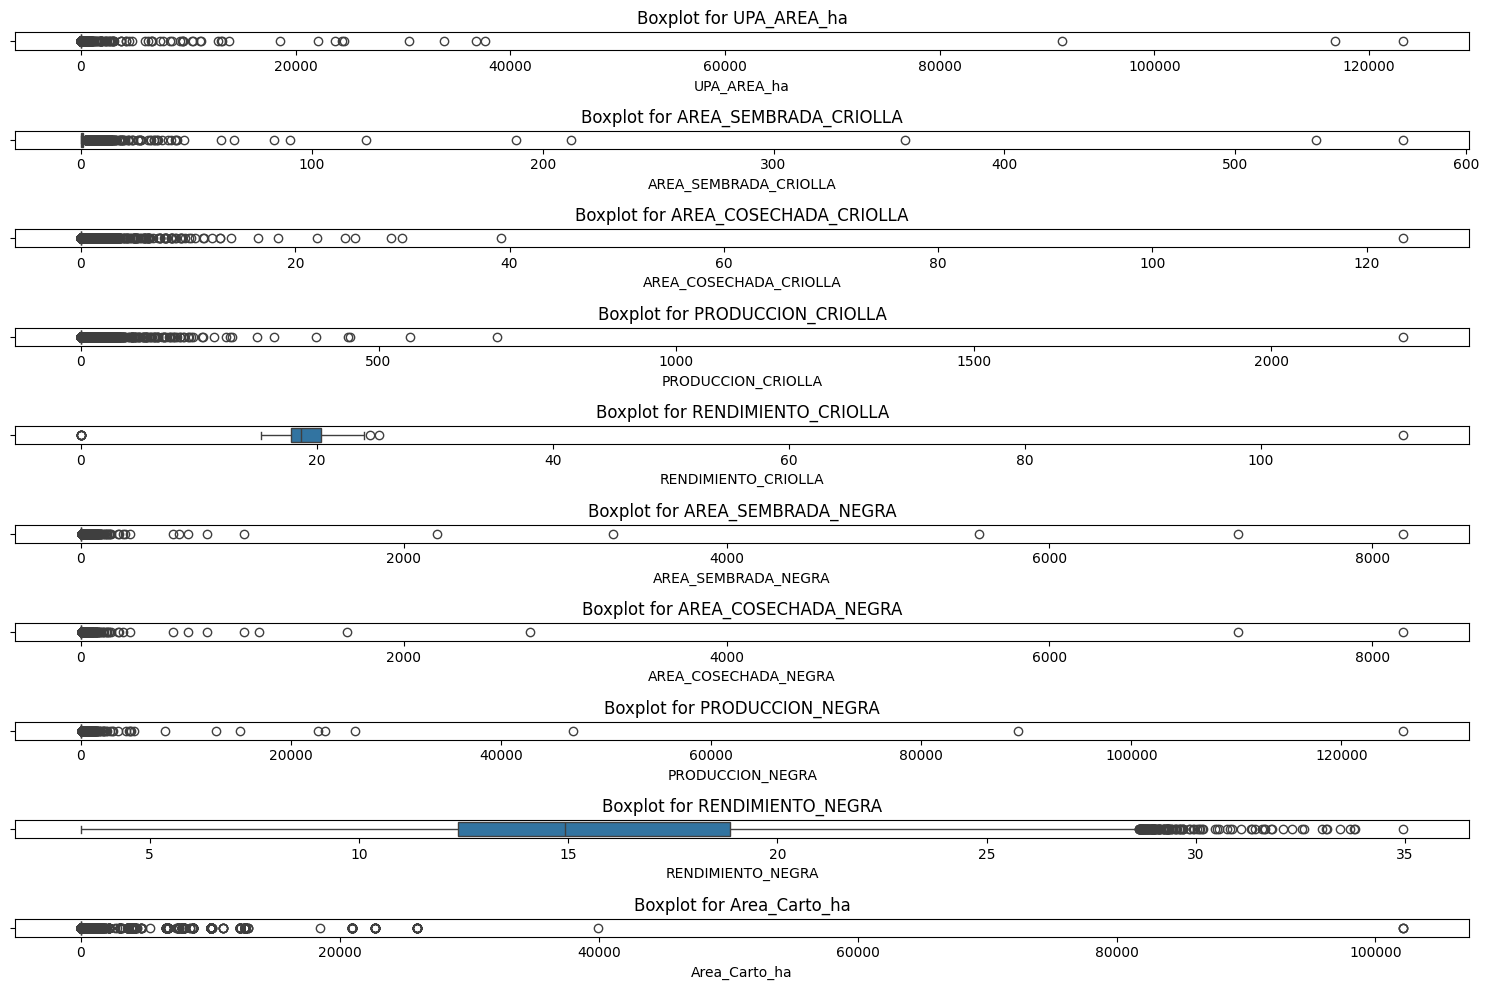

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Generar un boxplot para cada columna numérica
for i, column in enumerate(df_numerico.columns, 1):
    plt.subplot(len(df_numerico.columns), 1, i)
    sns.boxplot(x=df_numerico[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
df_numerico.describe()

,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
count,37484.000000,6221.000000,6221.000000,6221.000000,1258.000000,32869.000000,32869.000000,32869.000000,32869.000000,36895.000000
mean,30.816426,1.531621,0.276534,4.947853,19.086428,3.190960,2.371406,38.094987,15.589609,304.877690
std,1118.108164,12.054708,2.044221,36.231268,3.510013,71.816320,63.757661,931.580312,5.277459,1898.955830
min,0.007254,0.010017,0.000000,0.000000,0.000273,0.010026,0.010026,0.036156,3.361252,0.003464
25%,0.530939,0.105607,0.000000,0.000000,17.831738,0.127145,0.095182,1.306891,12.361419,0.779181
50%,1.680011,0.321600,0.000000,0.000000,18.676614,0.539060,0.393605,5.703993,14.925701,2.179344
75%,5.190562,1.000000,0.000000,0.000000,20.348524,1.905341,1.372049,21.323980,18.869852,7.456091
max,123198.560100,572.782411,123.417969,2222.049240,112.083752,8192.000000,8192.000000,125889.037665,34.959519,102149.890628


<Axes: title={'center': 'PRODUCCION_CRIOLLA'}, ylabel='Frequency'>

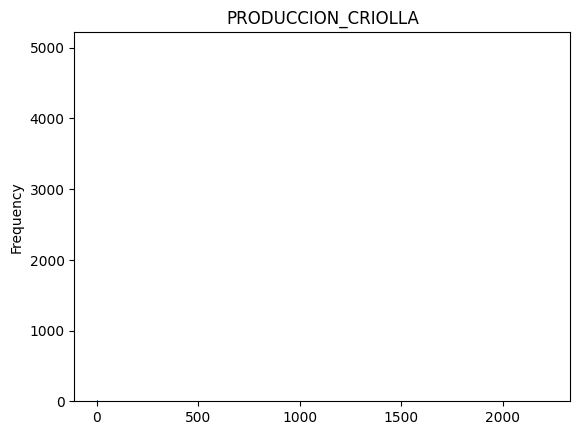

In [ ]:
from matplotlib import pyplot as plt
df_numerico['PRODUCCION_CRIOLLA'].plot(kind='hist', bins=10000, title='PRODUCCION_CRIOLLA')

(array([3.7357e+04, 3.9000e+01, 1.8000e+01, 5.0000e+00, 1.1000e+01,
        5.0000e+00, 3.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <BarContainer object of 10 artists>)

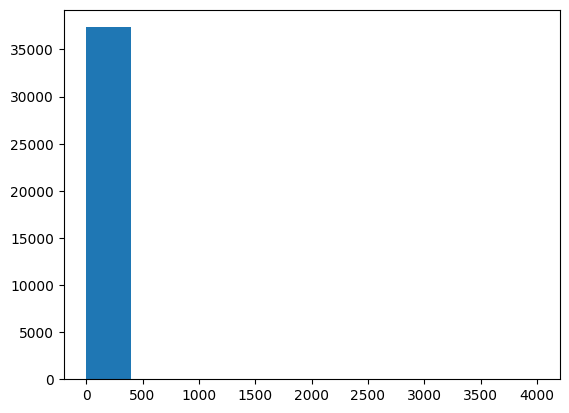

In [ ]:
plt.hist(df['UPA_AREA_ha'], range=[0, 4000])

<Axes: >

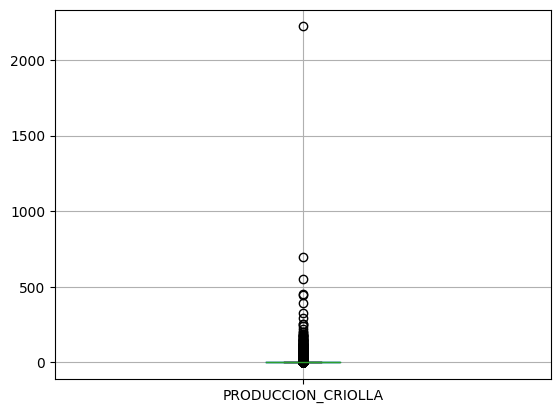

In [ ]:
df.boxplot(column=['PRODUCCION_CRIOLLA'])

<Axes: >

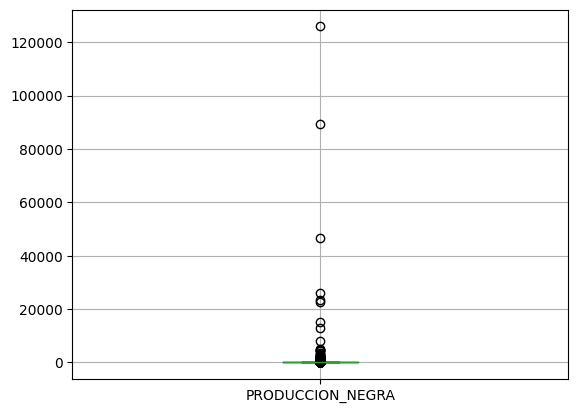

In [ ]:
df.boxplot(column=['PRODUCCION_NEGRA'])

# K-medias

# Variedad (Criolla)

In [71]:
df_criolla = df[df['AREA_SEMBRADA_CRIOLLA'] > 0]

In [72]:
df_criolla

,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,aptitudS2,Area_Carto_ha,Tamanopredial16,Informalidad,AF,Aptitud_ps1,Aptitud_ps2,tipo_frontera,POINT_X,POINT_Y
9,10,123198.560100,Papa negra y criolla,Técnificado,572.782411,0.000000,0.000000,NaN,5565.281774,2782.493359,...,No apta,102149.890628,E6.Mayor a 10000 ha,NaN,Agricultura familiar,Exclusión,Exclusión,No aplica,-77.353417,0.565217
15,16,3.988371,Papa criolla,Tradicional,0.707383,0.000000,0.000000,NaN,NaN,NaN,...,Aptitud alta,4.049917,B1.Mayor a 3 ha - hasta 5 ha,INFORMAL,Agricultura familiar,Alto,Alto,No condicionada,-77.557831,0.655371
21,22,4.491572,Papa criolla,Tradicional,0.500000,0.500000,10.938487,21.876974,NaN,NaN,...,Aptitud alta,4.487536,B1.Mayor a 3 ha - hasta 5 ha,FORMAL,Agricultura familiar,Alto,Alto,No condicionada,-77.559204,0.660337
24,25,10.377833,Papa criolla,Tradicional,0.090365,0.000000,0.000000,NaN,NaN,NaN,...,Aptitud alta,10.410221,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,Agricultura familiar,Alto,Alto,No condicionada,-77.536156,0.662239
26,27,1.962976,Papa criolla,Tradicional,0.411035,0.000000,0.000000,NaN,NaN,NaN,...,Aptitud alta,1.154393,"A3.Mayor a 1 ha - hasta 2,5 ha",NaN,Agricultura familiar,Alto,Alto,No condicionada,-77.573326,0.663080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37468,37469,376.153501,Papa criolla,Técnificado,1.430987,1.430987,25.478820,17.805063,NaN,NaN,...,Exclusión legal,534.339779,E2.Mayor a 500 ha - hasta 1000 ha,INFORMAL,Agricultura familiar,Exclusión,Exclusión,No aplica,-72.468704,7.471308
37469,37470,13.469536,Papa criolla,Tradicional,0.159430,0.159430,2.658782,16.676754,NaN,NaN,...,No apta,17.358394,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-72.512840,7.490574
37477,37478,9.892251,Papa criolla,Tradicional,0.500000,0.500000,8.908970,17.817939,NaN,NaN,...,Aptitud alta,6.657874,B2.Mayor a 5 ha - hasta 10 ha,FORMAL,NaN,Alto,Alto,No condicionada,-72.516846,7.504221
37478,37479,2.091054,Papa criolla,Técnificado,0.714794,0.000000,0.000000,NaN,NaN,NaN,...,No apta,3.085434,B1.Mayor a 3 ha - hasta 5 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-72.489502,7.512645


<Axes: >

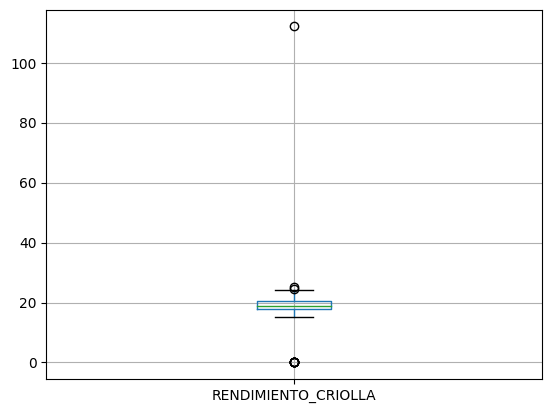

In [73]:
df_criolla.boxplot(column=['RENDIMIENTO_CRIOLLA'])

In [74]:
df_cri = df_criolla.select_dtypes(include=['float64', 'int64'])
df_cri=df_cri.drop(columns=['POINT_X','POINT_Y','OBJECTID'])

In [75]:
df_cri

,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
9,123198.560100,572.782411,0.000000,0.000000,NaN,5565.281774,2782.493359,46798.263185,16.843428,102149.890628
15,3.988371,0.707383,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.049917
21,4.491572,0.500000,0.500000,10.938487,21.876974,NaN,NaN,NaN,NaN,4.487536
24,10.377833,0.090365,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.410221
26,1.962976,0.411035,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.154393
...,...,...,...,...,...,...,...,...,...,...
37468,376.153501,1.430987,1.430987,25.478820,17.805063,NaN,NaN,NaN,NaN,534.339779
37469,13.469536,0.159430,0.159430,2.658782,16.676754,NaN,NaN,NaN,NaN,17.358394
37477,9.892251,0.500000,0.500000,8.908970,17.817939,NaN,NaN,NaN,NaN,6.657874
37478,2.091054,0.714794,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,3.085434


In [76]:
df_cri = df_cri.fillna(0)
df_cri

,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
9,123198.560100,572.782411,0.000000,0.000000,0.000000,5565.281774,2782.493359,46798.263185,16.843428,102149.890628
15,3.988371,0.707383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.049917
21,4.491572,0.500000,0.500000,10.938487,21.876974,0.000000,0.000000,0.000000,0.000000,4.487536
24,10.377833,0.090365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.410221
26,1.962976,0.411035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.154393
...,...,...,...,...,...,...,...,...,...,...
37468,376.153501,1.430987,1.430987,25.478820,17.805063,0.000000,0.000000,0.000000,0.000000,534.339779
37469,13.469536,0.159430,0.159430,2.658782,16.676754,0.000000,0.000000,0.000000,0.000000,17.358394
37477,9.892251,0.500000,0.500000,8.908970,17.817939,0.000000,0.000000,0.000000,0.000000,6.657874
37478,2.091054,0.714794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.085434


In [26]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.2 MB/s eta 0:00:00


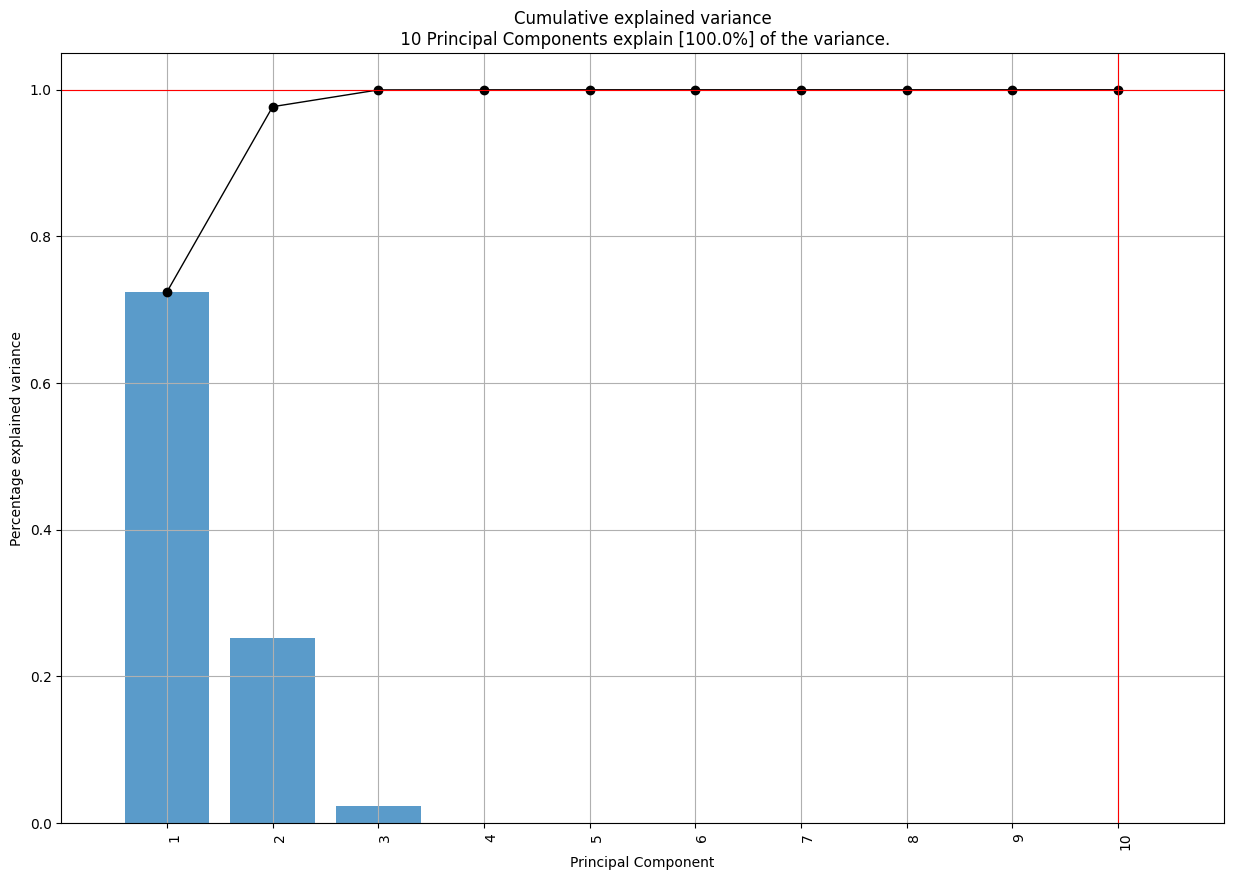

In [77]:
#Evaluación componentes principales (reduccion de dimensionalidad)
from pca import pca

model = pca(10,normalize=False,verbose=True)
results = model.fit_transform(df_cri)

# Gráfica
fig, ax = model.plot()

In [62]:
#Varianza explicada
results.get('explained_var')

array([0.72437932, 0.97691894, 0.99981891, 0.99993154, 0.99998721,
       0.99999252, 0.99999698, 0.99999921, 0.99999999, 1.        ])

3 componentes explican mas del 99% de la varianza de los datos

In [78]:
model = pca(3,normalize=True,verbose=True)
results = model.fit_transform(df_cri)
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1,PC2,PC3
UPA_AREA_ha,0.359675,0.027965,0.088844
AREA_SEMBRADA_CRIOLLA,0.412084,0.010089,0.084500
AREA_COSECHADA_CRIOLLA,0.077104,0.661160,0.137876
PRODUCCION_CRIOLLA,0.077174,0.663434,0.129379
RENDIMIENTO_CRIOLLA,0.017323,0.305976,-0.460528
AREA_SEMBRADA_NEGRA,0.444594,-0.093050,-0.013548
AREA_COSECHADA_NEGRA,0.448800,-0.069499,-0.013929
PRODUCCION_NEGRA,0.437028,-0.051615,-0.017726
RENDIMIENTO_NEGRA,0.033091,0.060670,-0.852325
Area_Carto_ha,0.312163,-0.091567,-0.099907


De acuerdo a los loadings se podrían establecer los siguientes indices:

*   PC1: Muestra unos valores altos asociados a la capacidad productiva de variedad Negra, por lo que podría funcionar como un indice de adaptabilidad y diversidad de cultivos para cada UPA.
*   PC2: Muestra valores altos asociados a la capcidad productiva de variedad Criolla, y valores negativos para la variedad Negra, por lo que podría ser un indicador de la capacidad de especilaización de cada UPA en la variedad criolla.
*   PC3: Muestra valores negativos para rendimientos y areas sembradas, por lo que podría asociarse a un indice de uso ineficiente de la tierra y los recursos de cada UPA.





In [79]:
from sklearn.preprocessing import scale
scores=pd.DataFrame(scale(df_cri).dot(loadings_pca))
scores.columns = ['PC1','PC2','PC3']
scores.head()

,PC1,PC2,PC3
0,136.585490,-16.811580,-1.031587
1,-0.167558,-0.350366,0.659182
2,-0.083929,0.866726,-0.556723
3,-0.186807,-0.351104,0.654754
4,-0.178410,-0.350503,0.657181


In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(scores)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(scores, kmeans.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)

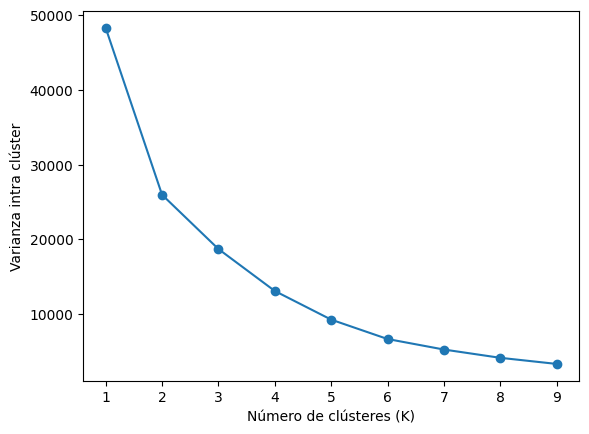

In [81]:
plt.plot(range(1, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

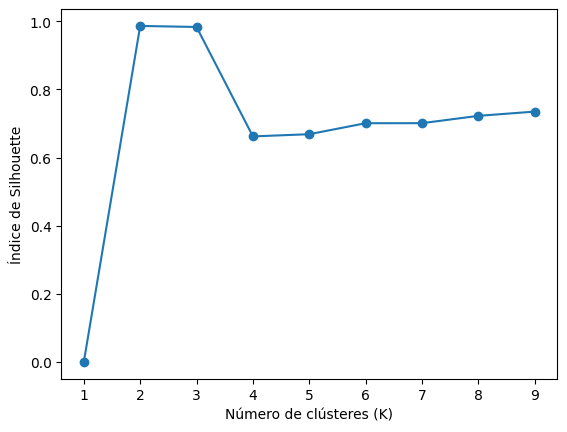

In [82]:
plt.plot(range(1, 10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

El análisis visual indica que 2 clusters es el número óptimo para clasificar a los datos, por lo tanto se eligen 3 clusters de clasificación.

In [83]:
kmeans_criolla = KMeans(n_clusters = 2, random_state = 1234).fit(scores)
df_cri['cluster'] = kmeans_criolla.labels_
df_cri.groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
cluster,,,,,,,,,,
0,97.556703,1.354001,0.276623,4.949444,3.860866,1.290403,1.017069,16.956034,4.206484,162.538932
1,73767.661294,553.843302,0.000000,0.000000,0.000000,4431.783060,2215.817766,35022.470786,15.453302,64047.826325


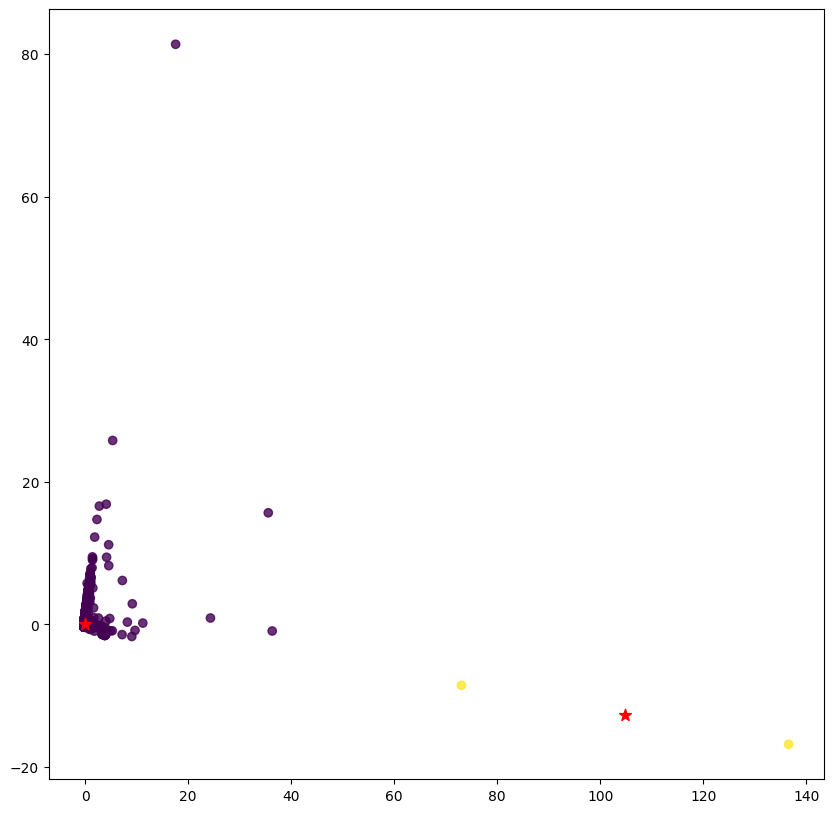

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = df_cri['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans_criolla.cluster_centers_[:,0],kmeans_criolla.cluster_centers_[:,1],c=['r'],marker='*',s=80)
plt.show()

Se observa que los datos para la variedad criolla se logran representar en dos grupos:

*   UPAs medianas-pequeñas con niveles de producción bajos (agricultores pequeños, grupos familiares) que no privilegian la produccion de ninguna variedad y que extraen unos rendimientos minimos para subsitir de la actividad agricola sin demasiados excedentes.

*   UPAs grandes: Tienen extensiones de tierra mayores que logran dedicar a la producción de ambas variedades; sin embargo la variedad criolla no representa su mayor flujo de rendimientos, la variedad negra representa una fuente de rendimientos e ingresos mayor.



# Variedad Negra

In [49]:
df_negra = df[df['AREA_SEMBRADA_NEGRA'] > 0]

<Axes: >

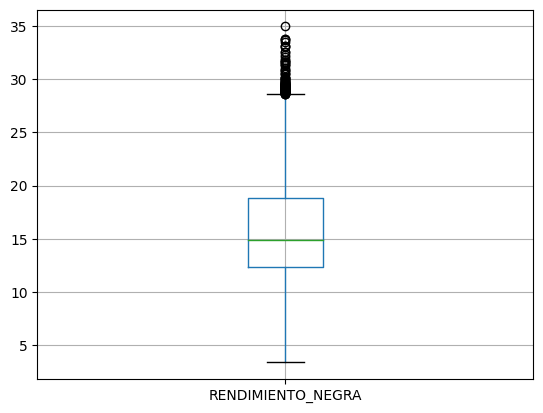

In [ ]:
df_negra.boxplot(column=['RENDIMIENTO_NEGRA'])

In [51]:
df_neg = df_negra.select_dtypes(include=['float64', 'int64'])
df_neg=df_neg.drop(columns=['POINT_X','POINT_Y','OBJECTID'])
df_neg = df_neg.fillna(0)
df_neg

,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
0,4.536894,0.0,0.0,0.0,0.0,5.675319,2.837659,46.730048,16.477226,0.770883
1,5.746113,0.0,0.0,0.0,0.0,6.251476,3.125738,53.873336,17.225150,16.680406
2,2.497989,0.0,0.0,0.0,0.0,2.700281,1.350141,24.437288,17.902160,16.680406
3,3.067768,0.0,0.0,0.0,0.0,1.784022,0.892011,15.814039,17.728520,16.680406
4,4.313402,0.0,0.0,0.0,0.0,2.891453,1.445727,24.210178,16.746027,16.680406
...,...,...,...,...,...,...,...,...,...,...
37476,1.063524,0.0,0.0,0.0,0.0,0.012879,0.012879,0.108451,8.420515,2.158358
37479,18.450571,0.0,0.0,0.0,0.0,0.768039,0.768039,6.210447,8.086106,28.108901
37480,20.713119,0.0,0.0,0.0,0.0,0.080800,0.080800,0.664025,8.218135,8.003977
37481,1.259805,0.0,0.0,0.0,0.0,0.445013,0.445013,3.571356,8.025279,5.075917


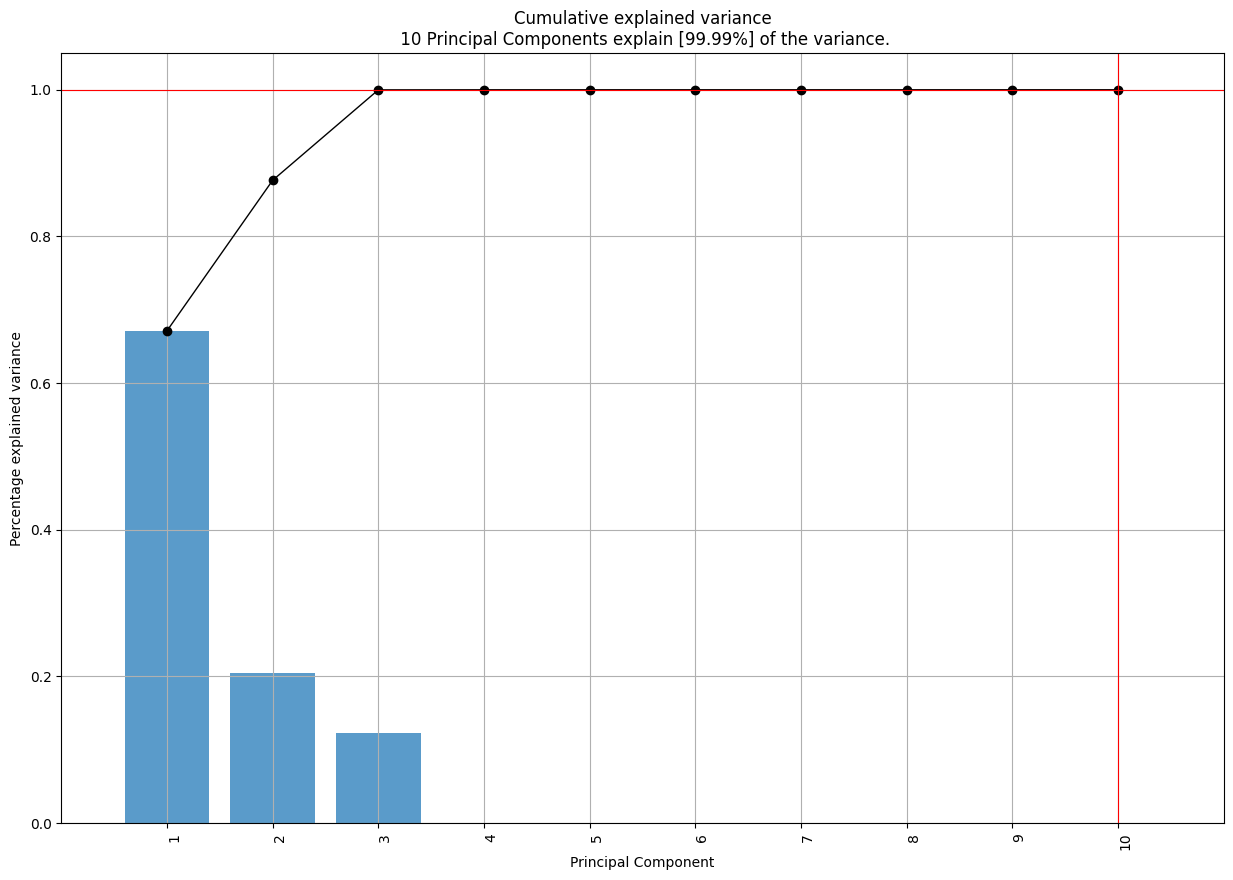

In [52]:
#Evaluación componentes principales (reduccion de dimensionalidad)
model = pca(10,normalize=False,verbose=True)
results = model.fit_transform(df_neg)

# Gráfica
fig, ax = model.plot()

In [53]:
#Varianza explicada
results.get('explained_var')

array([0.67124081, 0.87654259, 0.99987224, 0.99996614, 0.99998273,
       0.99999382, 0.99999864, 0.99999935, 0.99999999, 1.        ])

Los primeros 3 componentes principales logran explicar mas del 99% de la varianza en los datos.

In [64]:
model = pca(3,normalize=True,verbose=True)
results = model.fit_transform(df_neg)
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1,PC2,PC3
UPA_AREA_ha,0.298799,0.036129,0.559144
AREA_SEMBRADA_CRIOLLA,0.336944,0.036637,0.531603
AREA_COSECHADA_CRIOLLA,0.100714,0.621828,-0.068107
PRODUCCION_CRIOLLA,0.101359,0.629504,-0.080135
RENDIMIENTO_CRIOLLA,0.048317,0.420587,-0.056670
AREA_SEMBRADA_NEGRA,0.522138,-0.114322,-0.160432
AREA_COSECHADA_NEGRA,0.491057,-0.117189,-0.311119
PRODUCCION_NEGRA,0.495117,-0.101569,-0.290799
RENDIMIENTO_NEGRA,-0.001293,-0.005606,-0.098816
Area_Carto_ha,0.124615,-0.019049,0.416680


A partír de los loadings de cada componente principal, se puede hacer el siguiente análisis:

*   PC1: Muestra valores altos asociados a niveles de producción de la variedad negra, por loq ue podría interpretarse como un indice de especialización de esta variedad para cada UPA.
*   PC2: Muestra valores altos asociados a la variedad criolla, por lo que podria considerarse un indice de diversificación de cultivos para cada UPA.
*   PC3: Muestra valores altos para la medidas de área, y valores negativos para medidas de producción, por lo que se podría considerar un indice de ineficiencia de uso del terreno para cada UPA.






In [65]:
scores=pd.DataFrame(scale(df_neg).dot(loadings_pca))
scores.columns = ['PC1','PC2','PC3']
scores.head()

,PC1,PC2,PC3
0,-0.025360,-0.115284,-0.108132
1,-0.013970,-0.118418,-0.122995
2,-0.070210,-0.107123,-0.111633
3,-0.084777,-0.103678,-0.101101
4,-0.067399,-0.106287,-0.089831


In [66]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(scores)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(scores, kmeans.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)

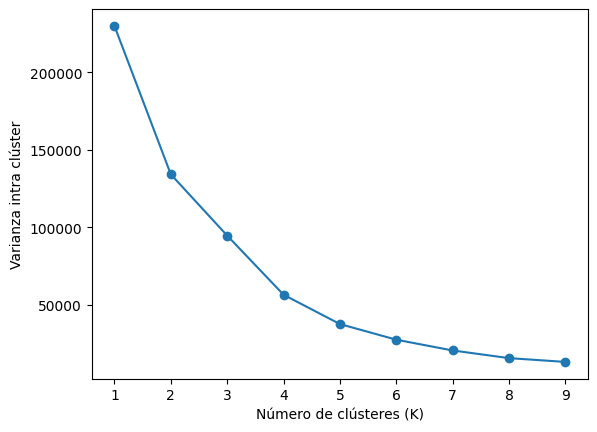

In [67]:
plt.plot(range(1, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

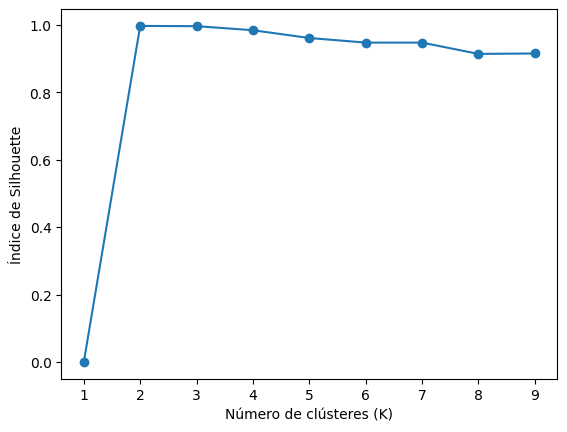

In [68]:
plt.plot(range(1, 10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [70]:
kmeans_negra = KMeans(n_clusters = 2, random_state = 1234).fit(scores)
df_neg['cluster'] = kmeans_negra.labels_
df_neg.groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha
cluster,,,,,,,,,,
0,23.138658,0.083695,0.023213,0.405241,0.254213,2.454286,1.769485,29.422105,15.589700,317.338396
1,36885.501239,276.921651,0.000000,0.000000,0.000000,6055.891530,4947.908883,71296.659745,14.841087,32024.232740


Se observan resultados similares a los obrenidos con datos exclusivos para la variedad criolla (UPAS medianas - pequeñas - UPAS grandes).

# Ambas variedades

In [111]:
df.head()

,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,aptitudS2,Area_Carto_ha,Tamanopredial16,Informalidad,AF,Aptitud_ps1,Aptitud_ps2,tipo_frontera,POINT_X,POINT_Y
0,1,4.536894,Papa negra,0,NaN,NaN,NaN,NaN,5.675319,2.837659,...,No apta,0.770883,"A2.Mayor a 0,5 ha - hasta 1 ha",0,Agricultura familiar,No_Apto,No_Apto,0,-77.136139,0.466445
1,2,5.746113,Papa negra,0,NaN,NaN,NaN,NaN,6.251476,3.125738,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
2,3,2.497989,Papa negra,1,NaN,NaN,NaN,NaN,2.700281,1.350141,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
3,4,3.067768,Papa negra,0,NaN,NaN,NaN,NaN,1.784022,0.892011,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
4,5,4.313402,Papa negra,0,NaN,NaN,NaN,NaN,2.891453,1.445727,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617


In [89]:
df.TIPO_CULTIVO.unique()

array(['Técnificado', 'Tradicional', 'No informa'], dtype=object)

In [93]:
df['TIPO_CULTIVO'].replace(['Técnificado', 'Tradicional', 'No informa'],
                        [0, 1, 2], inplace=True)

In [91]:
df.Informalidad.unique()

array(['INFORMAL', nan, 'FORMAL'], dtype=object)

In [97]:
df['Informalidad'] = df['Informalidad'].fillna('Otro')

In [98]:
df.Informalidad.unique()

array(['INFORMAL', 'Otro', 'FORMAL'], dtype=object)

In [99]:
df['Informalidad'].replace(['INFORMAL', 'Otro', 'FORMAL'],
                        [0, 1, 2], inplace=True)

In [92]:
df.tipo_frontera.unique()

array(['No condicionada', 'No aplica', 'Condicionada', nan], dtype=object)

In [100]:
df['tipo_frontera'] = df['tipo_frontera'].fillna('Otro')

In [101]:
df['tipo_frontera'].replace(['No condicionada', 'No aplica', 'Condicionada', 'Otro'],
                        [0, 1, 2, 3], inplace=True)

In [102]:
df.aptitudS1.unique()

array(['No apta', 'Aptitud alta', 'Exclusión legal', 'Aptitud media',
       'Aptitud baja'], dtype=object)

In [103]:
df.aptitudS2.unique()

array(['No apta', 'Aptitud alta', 'Exclusión legal', 'Aptitud baja',
       'Aptitud media'], dtype=object)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37484 entries, 0 to 37483
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                37484 non-null  int64  
 1   UPA_AREA_ha             37484 non-null  float64
 2   VARIEDAD                37484 non-null  object 
 3   TIPO_CULTIVO            37484 non-null  int64  
 4   AREA_SEMBRADA_CRIOLLA   6221 non-null   float64
 5   AREA_COSECHADA_CRIOLLA  6221 non-null   float64
 6   PRODUCCION_CRIOLLA      6221 non-null   float64
 7   RENDIMIENTO_CRIOLLA     1258 non-null   float64
 8   AREA_SEMBRADA_NEGRA     32869 non-null  float64
 9   AREA_COSECHADA_NEGRA    32869 non-null  float64
 10  PRODUCCION_NEGRA        32869 non-null  float64
 11  RENDIMIENTO_NEGRA       32869 non-null  float64
 12  elemento                37484 non-null  object 
 13  aptitudS1               37484 non-null  object 
 14  aptitudS2               37484 non-null

In [105]:
df.head()

,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,aptitudS2,Area_Carto_ha,Tamanopredial16,Informalidad,AF,Aptitud_ps1,Aptitud_ps2,tipo_frontera,POINT_X,POINT_Y
0,1,4.536894,Papa negra,0,NaN,NaN,NaN,NaN,5.675319,2.837659,...,No apta,0.770883,"A2.Mayor a 0,5 ha - hasta 1 ha",0,Agricultura familiar,No_Apto,No_Apto,0,-77.136139,0.466445
1,2,5.746113,Papa negra,0,NaN,NaN,NaN,NaN,6.251476,3.125738,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
2,3,2.497989,Papa negra,1,NaN,NaN,NaN,NaN,2.700281,1.350141,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
3,4,3.067768,Papa negra,0,NaN,NaN,NaN,NaN,1.784022,0.892011,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617
4,5,4.313402,Papa negra,0,NaN,NaN,NaN,NaN,2.891453,1.445727,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,0,NaN,No_Apto,No_Apto,0,-77.178711,0.528617


In [112]:
dummies = pd.get_dummies(df.Tamanopredial16,dtype=int)
merged_df = pd.concat([df, dummies], axis='columns')
merged_df.drop(['Tamanopredial16', 'E6.Mayor a 10000 ha'], axis='columns')


,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,B2.Mayor a 5 ha - hasta 10 ha,C1.Mayor a 10 ha - hasta 20 ha,D1.Mayor a 20 ha - hasta 50 ha,D2.Mayor a 50 ha - hasta 100 ha,D3.Mayor a 100 ha - hasta 200 ha,E1.Mayor a 200 ha - hasta 500 ha,E2.Mayor a 500 ha - hasta 1000 ha,E3.Mayor a 1000 ha - hasta 2000 ha,E4.Mayor a 2000 ha - hasta 5000 ha,E5.Mayor a 5000 ha - hasta 10000 ha
0,1,4.536894,Papa negra,0,NaN,NaN,NaN,NaN,5.675319,2.837659,...,0,0,0,0,0,0,0,0,0,0
1,2,5.746113,Papa negra,0,NaN,NaN,NaN,NaN,6.251476,3.125738,...,0,1,0,0,0,0,0,0,0,0
2,3,2.497989,Papa negra,1,NaN,NaN,NaN,NaN,2.700281,1.350141,...,0,1,0,0,0,0,0,0,0,0
3,4,3.067768,Papa negra,0,NaN,NaN,NaN,NaN,1.784022,0.892011,...,0,1,0,0,0,0,0,0,0,0
4,5,4.313402,Papa negra,0,NaN,NaN,NaN,NaN,2.891453,1.445727,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37479,37480,18.450571,Papa negra,1,NaN,NaN,NaN,NaN,0.768039,0.768039,...,0,0,1,0,0,0,0,0,0,0
37480,37481,20.713119,Papa negra,1,NaN,NaN,NaN,NaN,0.080800,0.080800,...,1,0,0,0,0,0,0,0,0,0
37481,37482,1.259805,Papa negra,0,NaN,NaN,NaN,NaN,0.445013,0.445013,...,1,0,0,0,0,0,0,0,0,0
37482,37483,1.352896,Papa criolla,1,0.514555,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [114]:
merged_df.columns

Index(['OBJECTID', 'UPA_AREA_ha', 'VARIEDAD', 'TIPO_CULTIVO',
       'AREA_SEMBRADA_CRIOLLA', 'AREA_COSECHADA_CRIOLLA', 'PRODUCCION_CRIOLLA',
       'RENDIMIENTO_CRIOLLA', 'AREA_SEMBRADA_NEGRA', 'AREA_COSECHADA_NEGRA',
       'PRODUCCION_NEGRA', 'RENDIMIENTO_NEGRA', 'elemento', 'aptitudS1',
       'aptitudS2', 'Area_Carto_ha', 'Tamanopredial16', 'Informalidad', 'AF',
       'Aptitud_ps1', 'Aptitud_ps2', 'tipo_frontera', 'POINT_X', 'POINT_Y',
       'A1.Hasta 0,5 ha', 'A2.Mayor a 0,5 ha - hasta 1 ha',
       'A3.Mayor a 1 ha - hasta 2,5 ha', 'A4.Mayor a 2,5 ha - hasta 3 ha',
       'B1.Mayor a 3 ha - hasta 5 ha', 'B2.Mayor a 5 ha - hasta 10 ha',
       'C1.Mayor a 10 ha - hasta 20 ha', 'D1.Mayor a 20 ha - hasta 50 ha',
       'D2.Mayor a 50 ha - hasta 100 ha', 'D3.Mayor a 100 ha - hasta 200 ha',
       'E1.Mayor a 200 ha - hasta 500 ha', 'E2.Mayor a 500 ha - hasta 1000 ha',
       'E3.Mayor a 1000 ha - hasta 2000 ha',
       'E4.Mayor a 2000 ha - hasta 5000 ha',
       'E5.Mayor a 5000 

In [115]:
new_df = merged_df.drop(['OBJECTID', 'VARIEDAD', 'elemento', 'aptitudS1', 'aptitudS2', 'Tamanopredial16', 'AF',
       'Aptitud_ps1', 'Aptitud_ps2', 'POINT_X', 'POINT_Y', 'E6.Mayor a 10000 ha'], axis=1)

In [117]:
new_df = new_df.fillna(0)
new_df

,UPA_AREA_ha,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,...,B2.Mayor a 5 ha - hasta 10 ha,C1.Mayor a 10 ha - hasta 20 ha,D1.Mayor a 20 ha - hasta 50 ha,D2.Mayor a 50 ha - hasta 100 ha,D3.Mayor a 100 ha - hasta 200 ha,E1.Mayor a 200 ha - hasta 500 ha,E2.Mayor a 500 ha - hasta 1000 ha,E3.Mayor a 1000 ha - hasta 2000 ha,E4.Mayor a 2000 ha - hasta 5000 ha,E5.Mayor a 5000 ha - hasta 10000 ha
0,4.536894,0,0.000000,0.0,0.0,0.0,5.675319,2.837659,46.730048,16.477226,...,0,0,0,0,0,0,0,0,0,0
1,5.746113,0,0.000000,0.0,0.0,0.0,6.251476,3.125738,53.873336,17.225150,...,0,1,0,0,0,0,0,0,0,0
2,2.497989,1,0.000000,0.0,0.0,0.0,2.700281,1.350141,24.437288,17.902160,...,0,1,0,0,0,0,0,0,0,0
3,3.067768,0,0.000000,0.0,0.0,0.0,1.784022,0.892011,15.814039,17.728520,...,0,1,0,0,0,0,0,0,0,0
4,4.313402,0,0.000000,0.0,0.0,0.0,2.891453,1.445727,24.210178,16.746027,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37479,18.450571,1,0.000000,0.0,0.0,0.0,0.768039,0.768039,6.210447,8.086106,...,0,0,1,0,0,0,0,0,0,0
37480,20.713119,1,0.000000,0.0,0.0,0.0,0.080800,0.080800,0.664025,8.218135,...,1,0,0,0,0,0,0,0,0,0
37481,1.259805,0,0.000000,0.0,0.0,0.0,0.445013,0.445013,3.571356,8.025279,...,1,0,0,0,0,0,0,0,0,0
37482,1.352896,1,0.514555,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


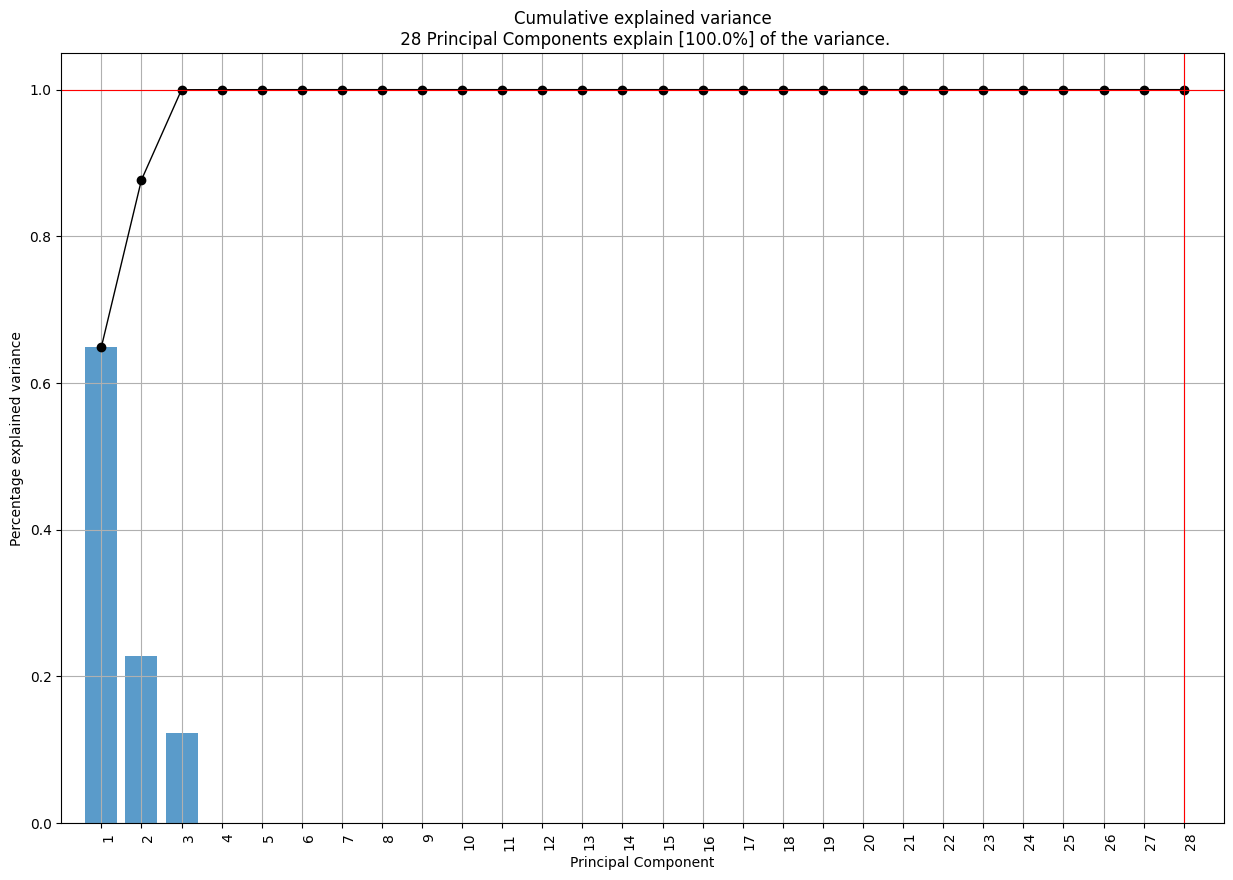

In [118]:
#Evaluación componentes principales (reduccion de dimensionalidad)
model = pca(28,normalize=False,verbose=True)
results = model.fit_transform(new_df)

# Gráfica
fig, ax = model.plot()

In [119]:
#Varianza explicada
results.get('explained_var')

array([0.64901708, 0.87687461, 0.99984589, 0.99993252, 0.99997138,
       0.99998741, 0.99999653, 0.99999844, 0.99999949, 0.99999966,
       0.99999981, 0.99999985, 0.99999988, 0.99999991, 0.99999993,
       0.99999995, 0.99999996, 0.99999997, 0.99999998, 0.99999998,
       0.99999999, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

Los primeros 3 componentes principales explican más del 99% de la varianza de los datos.

In [120]:
model = pca(3,normalize=True,verbose=True)
results = model.fit_transform(new_df)
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1,PC2,PC3
UPA_AREA_ha,0.291234,0.165127,0.220656
TIPO_CULTIVO,-0.026413,-0.053946,0.037992
AREA_SEMBRADA_CRIOLLA,0.324520,0.170553,0.204848
AREA_COSECHADA_CRIOLLA,0.108210,0.608318,-0.089418
PRODUCCION_CRIOLLA,0.107965,0.609611,-0.091545
RENDIMIENTO_CRIOLLA,0.037215,0.308270,-0.035387
AREA_SEMBRADA_NEGRA,0.522804,-0.154370,-0.090429
AREA_COSECHADA_NEGRA,0.496349,-0.177136,-0.150927
PRODUCCION_NEGRA,0.499043,-0.166291,-0.140865
RENDIMIENTO_NEGRA,-0.008169,-0.128803,0.129402


In [121]:
scores=pd.DataFrame(scale(new_df).dot(loadings_pca))
scores.columns = ['PC1','PC2','PC3']
scores.head()

,PC1,PC2,PC3
0,0.000574,-0.143314,-0.607533
1,0.060426,-0.055883,-0.193603
2,-0.062791,-0.177013,-0.078177
3,-0.015915,-0.041253,-0.167182
4,0.003551,-0.029074,-0.189043


In [122]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(scores)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(scores, kmeans.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)

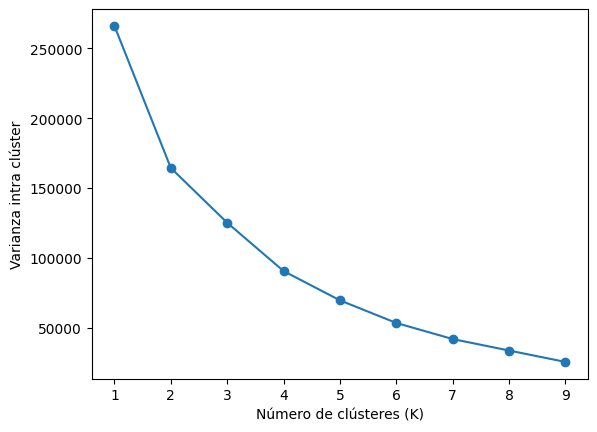

In [123]:
plt.plot(range(1, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

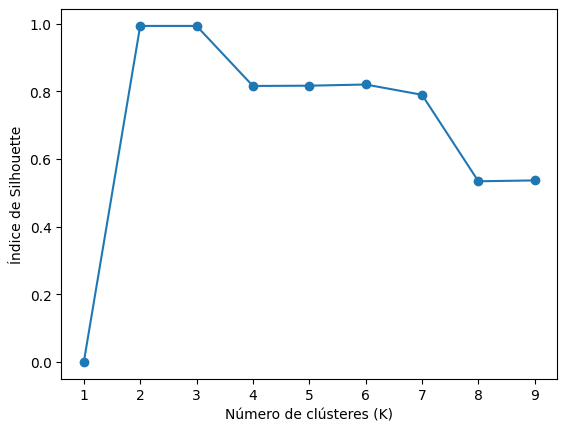

In [124]:
plt.plot(range(1, 10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

El análisis visual del coeficiente de Silhouette, muestra que el número óptimo de clusters para los datos está entre 2-3.

In [125]:
kmeans_completo = KMeans(n_clusters = 3, random_state = 1234).fit(scores)
new_df['cluster'] = kmeans_completo.labels_
new_df.groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,UPA_AREA_ha,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,...,B2.Mayor a 5 ha - hasta 10 ha,C1.Mayor a 10 ha - hasta 20 ha,D1.Mayor a 20 ha - hasta 50 ha,D2.Mayor a 50 ha - hasta 100 ha,D3.Mayor a 100 ha - hasta 200 ha,E1.Mayor a 200 ha - hasta 500 ha,E2.Mayor a 500 ha - hasta 1000 ha,E3.Mayor a 1000 ha - hasta 2000 ha,E4.Mayor a 2000 ha - hasta 5000 ha,E5.Mayor a 5000 ha - hasta 10000 ha
cluster,,,,,,,,,,,,,,,,,,,,,
0,26.067704,0.850903,0.221380,0.042608,0.761988,0.640164,2.152142,1.551645,25.799981,13.670469,...,0.102858,0.062995,0.04816,0.019131,0.013367,0.018677,0.00651,0.005256,0.016489,0.008111
1,36885.501239,0.250000,276.921651,0.000000,0.000000,0.000000,6055.891530,4947.908883,71296.659745,14.841087,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,30589.459897,0.000000,123.417969,123.417969,2222.049240,18.003776,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


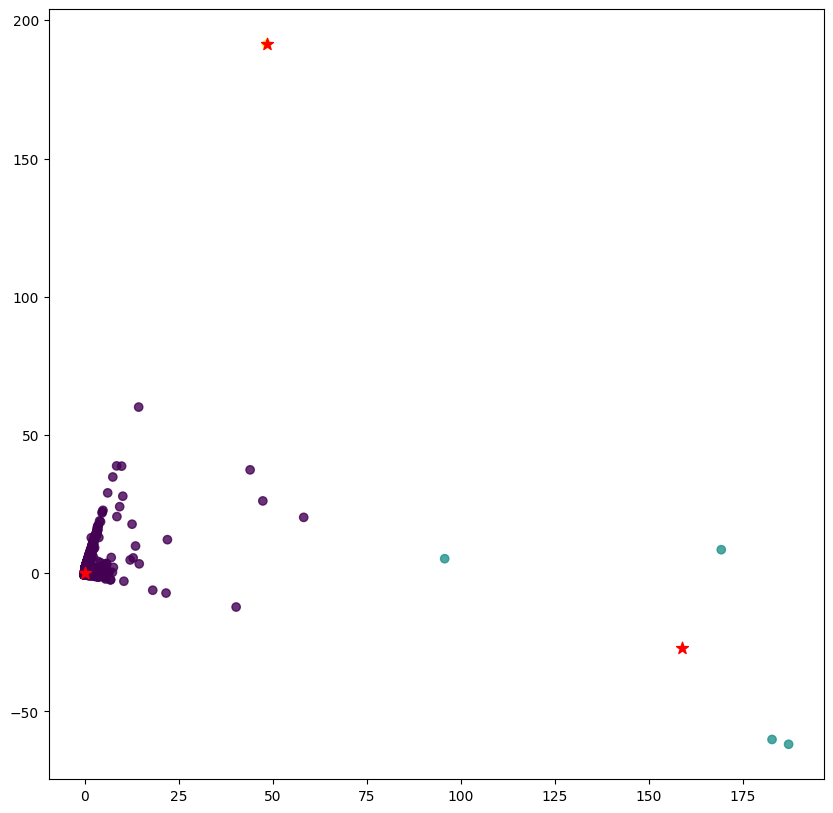

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = new_df['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans_completo.cluster_centers_[:,0],kmeans_completo.cluster_centers_[:,1],c=['r'],marker='*',s=80)
plt.show()

# Comentarios

Se desarrollo el algoritmo de K-medias en tres variaciones del grupo de datos (mayoría de UPAs dedicadas a la siembra de variedad criolla; mayoría de UPAs dedicadas a la siembra de variedad negra; conjunto de datos completo con ambas variedades).

En las dos primeras secciones del análisis se encuentran agrupaciónes de dos clusters con UPAs divididas de acuerdo a su tamaño y nivel de diversificación.

En la ultima sección del análisis se genero una división en 3 clusters que reflejan un grupo dedicado a la extracción de rendimientos de la variedad criolla, un grupo que basa su producción en la variedad negra y un grupo con una distribución de cosechas diversificada.